In this technical lesson, you'll learn how to implement Principal Component Analysis (PCA) using scikit-learn. PCA is a powerful dimensionality reduction technique that transforms your high-dimensional data into a smaller set of uncorrelated variables while preserving as much variance as possible.

When faced with datasets containing dozens or hundreds of features, data scientists often struggle with challenges like excessive computational requirements, the "curse of dimensionality" making machine learning models less effective, difficulty in visualizing and interpreting high-dimensional data, and multicollinearity issues in statistical models.

PCA directly addresses these challenges by finding the most informative directions in your data - the directions along which your data varies the most.

**Dataset**

We'll use the Iris dataset which comes built-in with scikit-learn. This classic dataset contains measurements of 150 iris flowers from three different species. Each flower has four features measured: sepal length, sepal width, petal length, and petal width. 

This dataset serves as an excellent example for PCA because:

- The four-dimensional data can be reduced to just two dimensions while preserving most of the variance.
- The results are easy to visualize and interpret.
- The dataset clearly demonstrates how PCA can reveal natural patterns and separations in the data.

##### Step 1: Prepare the Data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Set the random seed for reproducibility
np.random.seed(42)

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for easier exploration
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df['target'] = y
iris_df['target_name'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Look at the first few rows
print("First 5 rows of the dataset:")
print(iris_df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(iris_df.isnull().sum())

# Get basic statistics
print("\nBasic statistics:")
print(iris_df.describe())

# Standardize the features (critical for PCA)
X_std = StandardScaler().fit_transform(X)
print("\nStandardized data (first 3 rows):")
print(X_std[:3])

c:\Users\marha\.conda\envs\ml\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  

Missing values in the dataset:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

Basic statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.84

##### Step 2: Explore Feature Relationships #####

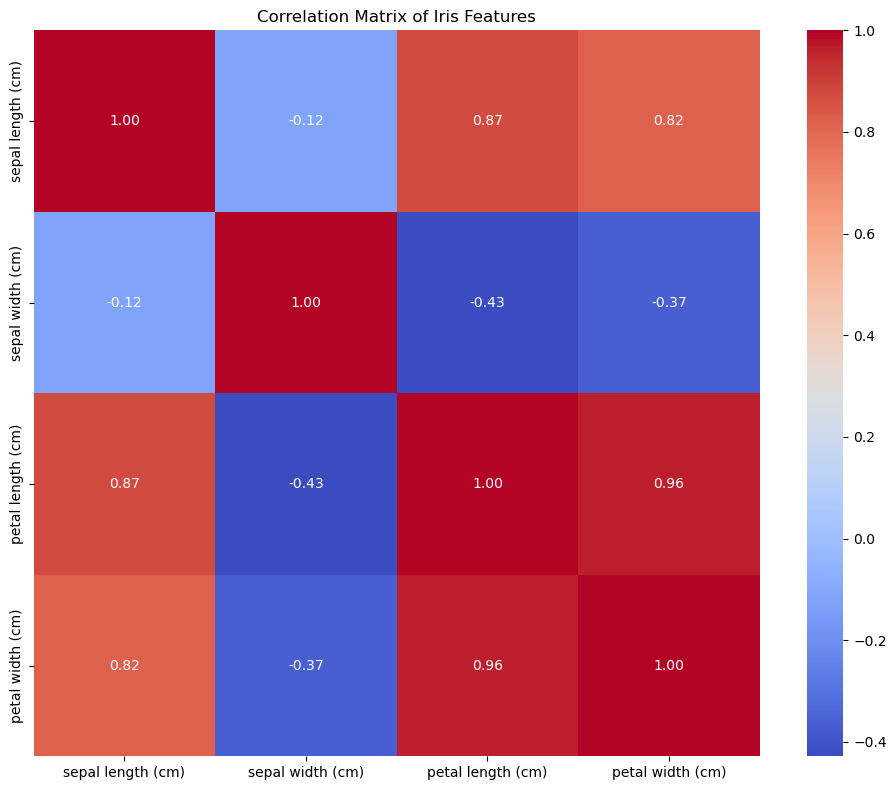

<Figure size 1200x1000 with 0 Axes>

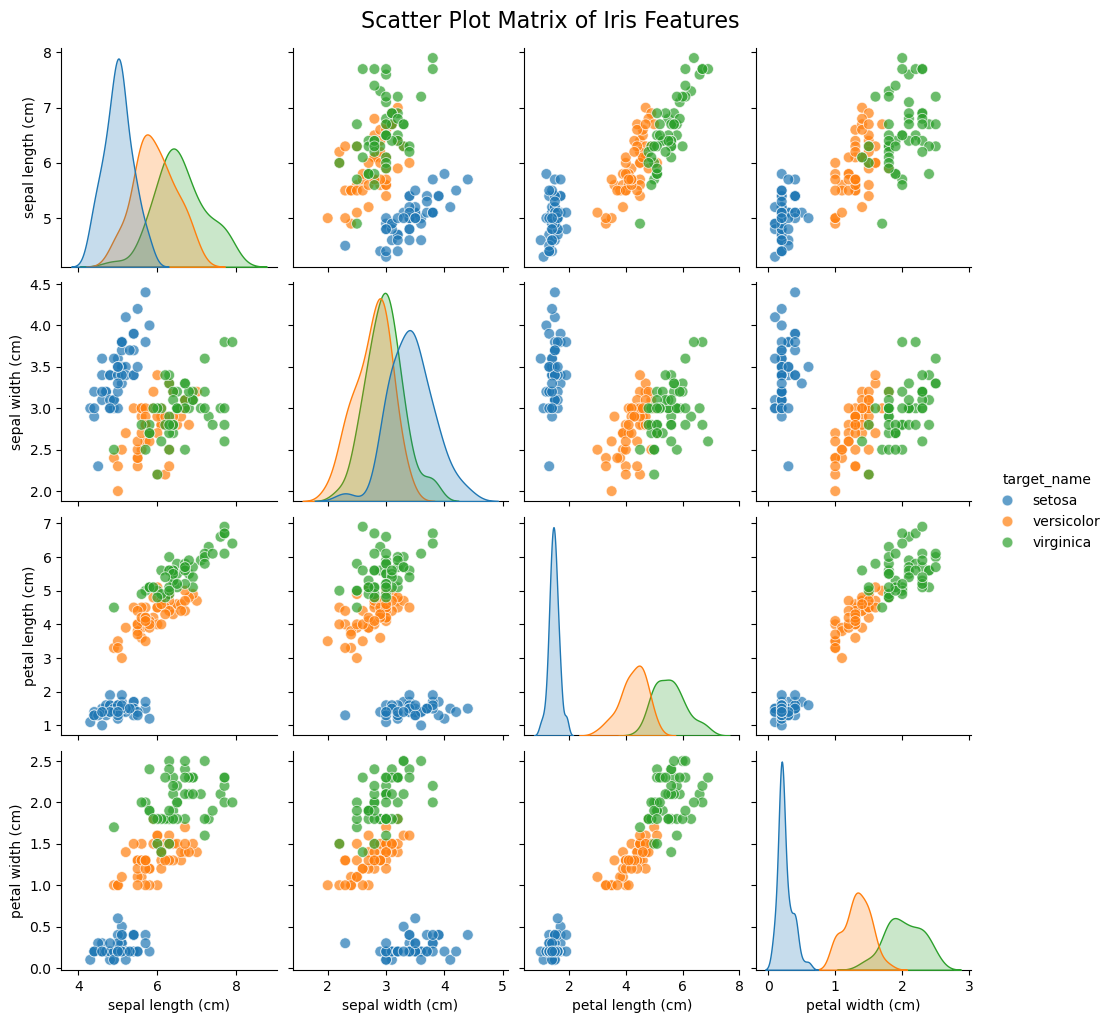

In [2]:
# Create a correlation matrix
corr_matrix = iris_df.iloc[:, :4].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()

# Create scatter plot matrix
plt.figure(figsize=(12, 10))
scatter_kws = {'alpha': 0.7, 's': 60}
sns.pairplot(iris_df, hue='target_name', vars=feature_names, plot_kws=scatter_kws)
plt.suptitle('Scatter Plot Matrix of Iris Features', y=1.02, fontsize=16)
plt.show()

##### Step 3: Implement PCA Transformation #####

In [3]:
# Initialize PCA without restricting the number of components (default)
pca = PCA()

# Fit PCA model to data
pca.fit(X_std)

# Transform the data to the new PC space
X_pca = pca.transform(X_std)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(
    data=X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)
pca_df['target'] = y
pca_df['target_name'] = pca_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Look at the transformed data
print("First 5 rows of PCA-transformed data:")
print(pca_df.head())

First 5 rows of PCA-transformed data:
        PC1       PC2       PC3       PC4  target target_name
0 -2.264703  0.480027  0.127706 -0.024168       0      setosa
1 -2.080961 -0.674134  0.234609 -0.103007       0      setosa
2 -2.364229 -0.341908 -0.044201 -0.028377       0      setosa
3 -2.299384 -0.597395 -0.091290  0.065956       0      setosa
4 -2.389842  0.646835 -0.015738  0.035923       0      setosa


##### Step 4: Analyze Variance Explained #####

Variance explained by each principal component:
  Principal Component  Eigenvalue  Variance Explained (%)  \
0                 PC1    2.938085               72.962445   
1                 PC2    0.920165               22.850762   
2                 PC3    0.147742                3.668922   
3                 PC4    0.020854                0.517871   

   Cumulative Variance Explained (%)  
0                          72.962445  
1                          95.813207  
2                          99.482129  
3                         100.000000  


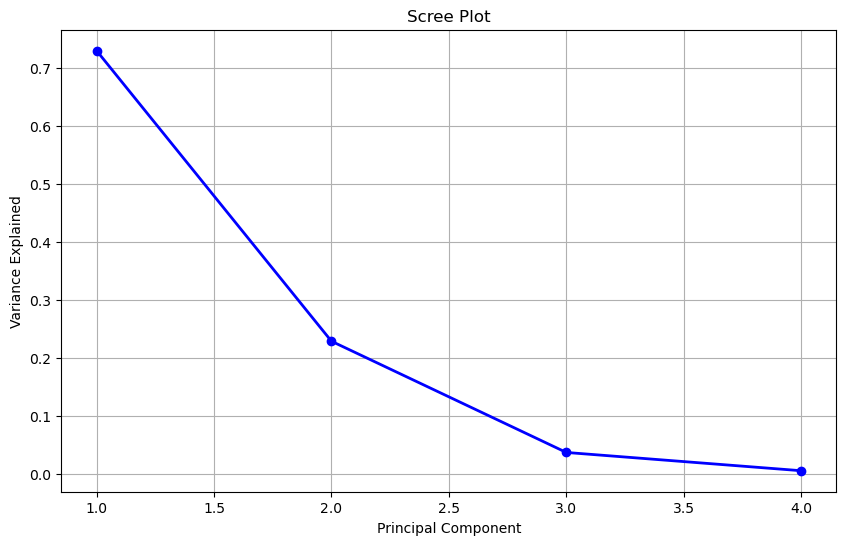

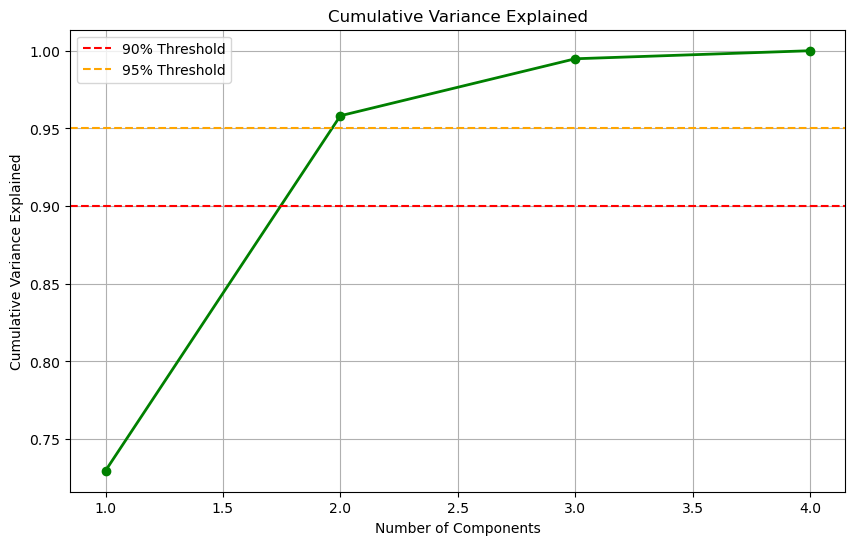

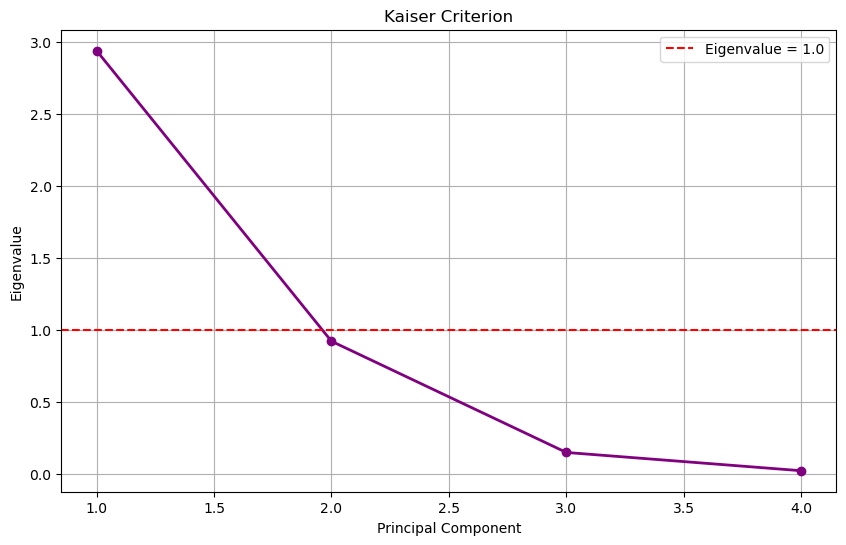

In [4]:
# Examine explained variance
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Create a dataframe for better display
variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Eigenvalue': explained_variance,
    'Variance Explained (%)': explained_variance_ratio * 100,
    'Cumulative Variance Explained (%)': cumulative_variance_ratio * 100
})

print("Variance explained by each principal component:")
print(variance_df)

# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# Create cumulative variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-', linewidth=2, color='green')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.axhline(y=0.95, color='orange', linestyle='--', label='95% Threshold')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

# Create Kaiser criterion plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', linewidth=2, color='purple')
plt.axhline(y=1.0, color='r', linestyle='--', label='Eigenvalue = 1.0')
plt.title('Kaiser Criterion')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)
plt.show()

##### Step 5: Select Optimal Components and Transform Data #####

In [5]:
# Determine optimal number of components based on different methods

# 1. Based on cumulative variance threshold (e.g., 95%)
target_variance = 0.95
n_components_variance = np.argmax(cumulative_variance_ratio >= target_variance) + 1
print(f"Number of components needed to explain {target_variance*100}% of variance: {n_components_variance}")

# 2. Based on Kaiser criterion (eigenvalues > 1)
n_components_kaiser = sum(explained_variance > 1.0)
print(f"Number of components with eigenvalues > 1: {n_components_kaiser}")

# Select the optimal number of components
n_components_optimal = n_components_variance  # We'll use the 95% variance criterion for this example

# Create a new PCA instance with optimal number of components
pca_optimal = PCA(n_components=n_components_optimal)
X_pca_optimal = pca_optimal.fit_transform(X_std)

# Display dimensionality reduction summary
print(f"\nOriginal data shape: {X.shape}")
print(f"Reduced data shape: {X_pca_optimal.shape}")
print(f"Dimensionality reduction: {X.shape[1]} → {X_pca_optimal.shape[1]}")

Number of components needed to explain 95.0% of variance: 2
Number of components with eigenvalues > 1: 1

Original data shape: (150, 4)
Reduced data shape: (150, 2)
Dimensionality reduction: 4 → 2


##### Step 6: Interpret Principal Components #####

Component loadings (how features contribute to PCs):
                        PC1       PC2       PC3       PC4
sepal length (cm)  0.521066  0.377418  0.719566 -0.261286
sepal width (cm)  -0.269347  0.923296 -0.244382  0.123510
petal length (cm)  0.580413  0.024492 -0.142126  0.801449
petal width (cm)   0.564857  0.066942 -0.634273 -0.523597


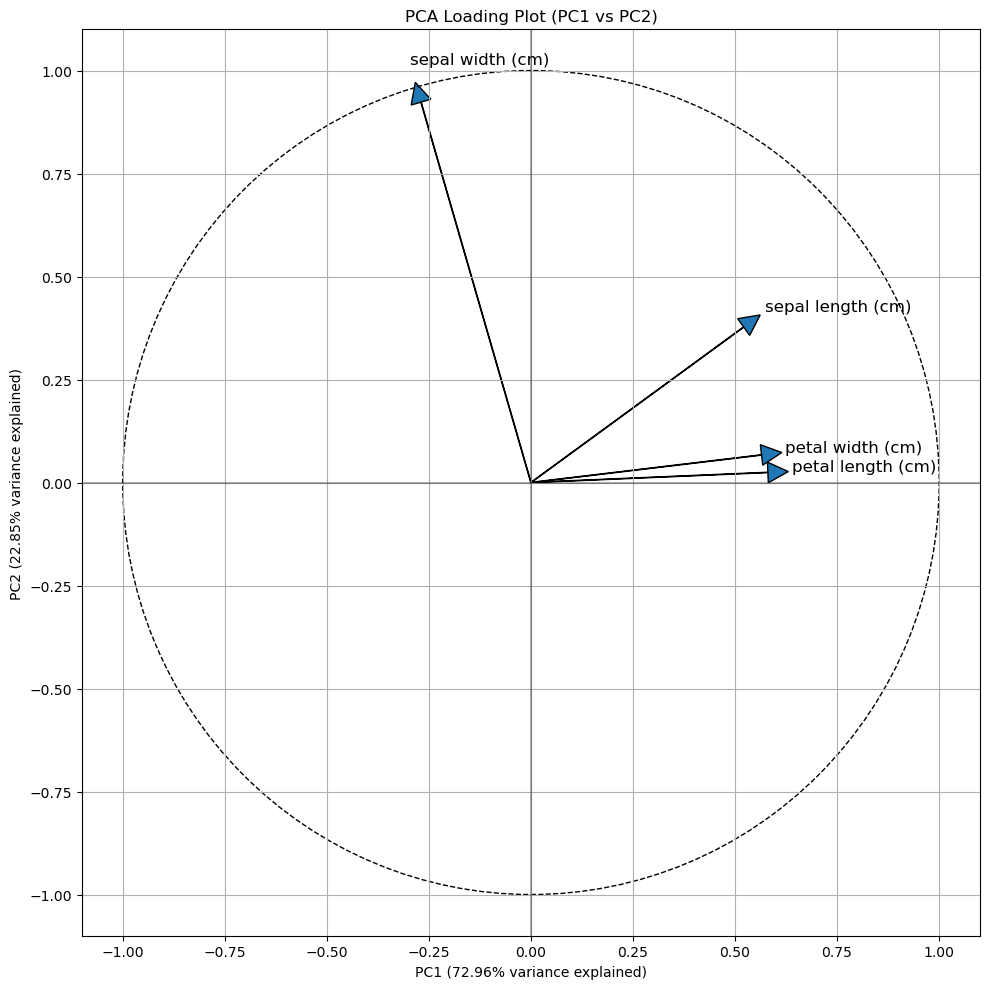

In [7]:
# Get the loadings (weights) of each feature for each principal component
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

print("Component loadings (how features contribute to PCs):")
print(loadings)

# Visualize the loadings for the first two PCs
plt.figure(figsize=(10, 10))
for i, feature in enumerate(feature_names):
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1], head_width=0.05, head_length=0.05)
    plt.text(loadings.iloc[i, 0]*1.1, loadings.iloc[i, 1]*1.1, feature, fontsize=12)

# Add a unit circle for reference
circle = plt.Circle((0, 0), 1, fill=False, linestyle='--')
plt.gca().add_patch(circle)

plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title('PCA Loading Plot (PC1 vs PC2)')
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%} variance explained)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%} variance explained)')
plt.tight_layout()
plt.show()

##### Step 7: Visualize and Apply Transformed Data #####

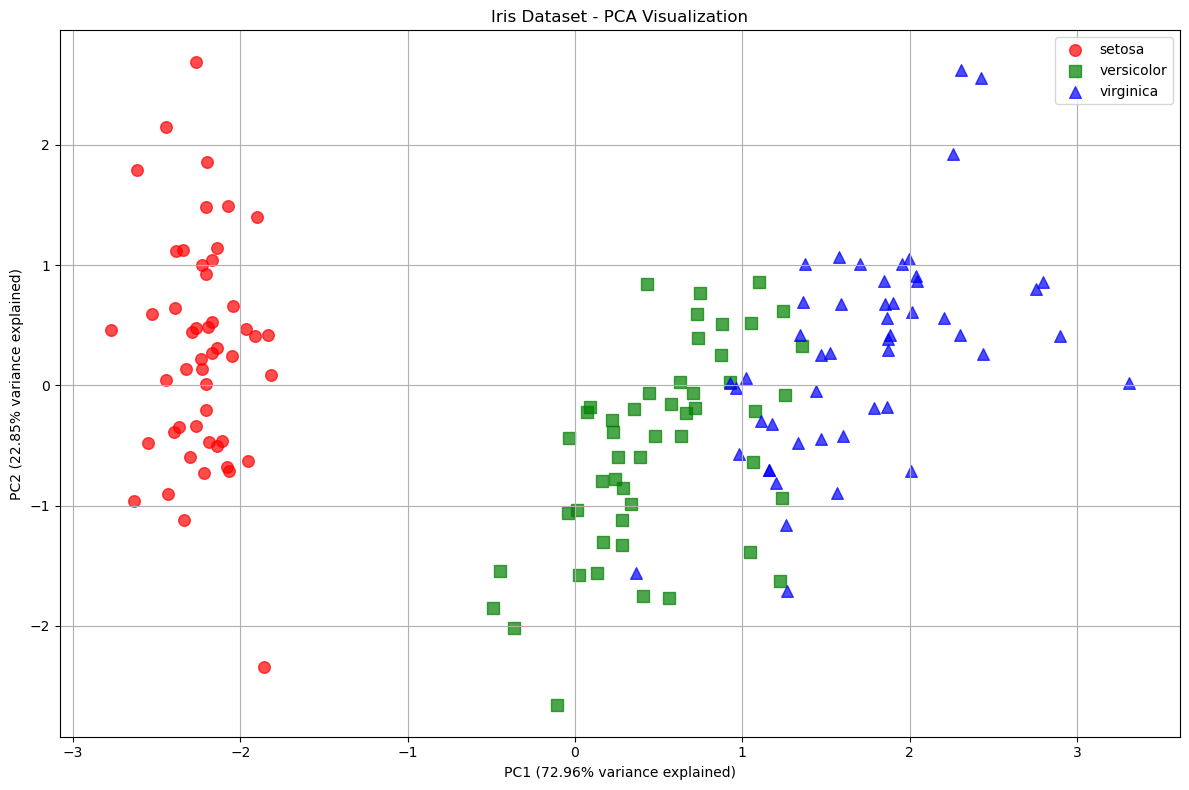


Mean squared reconstruction error: 0.0426
This represents the information loss from using 2 instead of 4 components.


In [8]:
# Create a 2D scatter plot of the transformed data
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
target_names = iris.target_names

for i, (color, marker, name) in enumerate(zip(colors, markers, target_names)):
    indices = y == i
    plt.scatter(
        X_pca_optimal[indices, 0],
        X_pca_optimal[indices, 1] if X_pca_optimal.shape[1] > 1 else np.zeros(sum(indices)),
        color=color,
        marker=marker,
        s=70,
        alpha=0.7,
        label=name
    )

plt.title('Iris Dataset - PCA Visualization')
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%} variance explained)')
if X_pca_optimal.shape[1] > 1:
    plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%} variance explained)')
else:
    plt.ylabel('Dimension 2 (not used)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# If we kept more than 2 components, create a 3D plot
if X_pca_optimal.shape[1] > 2:
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    for i, (color, marker, name) in enumerate(zip(colors, markers, target_names)):
        indices = y == i
        ax.scatter(
            X_pca_optimal[indices, 0],
            X_pca_optimal[indices, 1],
            X_pca_optimal[indices, 2],
            color=color,
            marker=marker,
            s=70,
            alpha=0.7,
            label=name
        )
    
    ax.set_title('Iris Dataset - PCA 3D Visualization')
    ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]:.2%} variance)')
    ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]:.2%} variance)')
    ax.set_zlabel(f'PC3 ({explained_variance_ratio[2]:.2%} variance)')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Optional: Reconstruct the original data from the PCA representation
# This shows how well the reduced representation preserves the original data
X_reconstructed = pca_optimal.inverse_transform(X_pca_optimal)
X_reconstructed_std = StandardScaler().fit_transform(X_reconstructed)

# Calculate reconstruction error
reconstruction_error = np.mean((X_std - X_reconstructed_std) ** 2)
print(f"\nMean squared reconstruction error: {reconstruction_error:.4f}")
print(f"This represents the information loss from using {n_components_optimal} instead of {X.shape[1]} components.")